In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':1,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Industries'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 60)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-05-02 to 2019-07-01 - 62'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
VPU,21,3.070225,1.086062,2.673473,3.258989
XLU,21,3.200003,1.143372,2.652974,3.237646
GDX,21,16.139900,6.141144,2.601019,5.999235
IGF,21,3.539383,1.489524,2.264291,1.751762
XAR,21,3.978999,1.942195,1.962899,2.579733
GDXJ,21,13.850689,7.349401,1.861924,6.657301
EMLP,21,1.805359,0.949870,1.725176,2.697335
IHI,21,6.124661,3.649837,1.632400,4.510425
XLB,21,5.963933,3.693794,1.569461,6.917232


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['VPU'] -1.021675679661814 0.8 0.6517977429664914 2.6734734226283052
['VPU', 'XLU'] -1.0224594505310887 0.991100582789203 0.6496634374266665 2.663223470746958
['VPU', 'GDX'] -1.8510974279307204 -0.13967350059545125 0.9258223297358883 2.6372462570711575
['XLU', 'GDX'] -1.924281855433759 -0.2209735744400123 0.9236880241960636 2.6269963051898104


['XLU', 'GDX']

In [9]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 8, ['XLU', 'GDX', 'EMLP', 'IXJ', 'VPU', 'IGF'], sr=0)

['XLU', 'GDX', 'EMLP', 'IXJ', 'VPU', 'IGF'] -0.5660889462871925 0.3578386466255001 0.6760724070873074 2.2236155638365545
['XLU', 'GDX', 'EMLP', 'IXJ', 'VPU', 'IGF', 'XAR'] -0.9410369870426362 0.40576572725762133 0.6531972856997424 2.1863704001571858
['XLU', 'GDX', 'EMLP', 'IXJ', 'VPU', 'IGF', 'XAR', 'GDXJ'] -1.281566380709692 0.3804534779078715 0.737980141382437 2.1458145457225077
['XLU', 'GDX', 'EMLP', 'IXJ', 'VPU', 'IGF', 'XAR', 'FXU'] -1.296707165015631 0.42620654280410875 0.6770862921802605 2.1027316884536207
['XLU', 'GDX', 'EMLP', 'IXJ', 'VPU', 'IGF', 'XAR', 'XLV'] -1.2976632199935603 0.4375426677873569 0.6647941122190832 2.077126088783836


['XLU', 'GDX', 'EMLP', 'IXJ', 'VPU', 'IGF', 'XAR', 'XLV']

In [16]:
quote.setup_mask(['XLU', 'GDX', 'EMLP'])
quote.find_optimal_ratio(21, .85)

({'XLU': 0.67, 'GDX': 0.13, 'EMLP': 0.05}, 4.3025, 0.9874, 4.1884)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,21.0,4.896314,1.198224,2.211777,4.318133,5.074330,5.790127,6.574460,3.947216,2.627637
XLU,21.0,3.200003,1.143372,0.994858,2.526463,3.380903,3.725425,5.349945,2.652974,3.237646
GDX,21.0,16.139900,6.141144,9.698991,11.477833,13.941641,23.062104,28.033265,2.601019,5.999235
IGF,21.0,3.539383,1.489524,-0.066720,2.984409,3.631700,4.800848,5.352718,2.264291,1.751762
XAR,21.0,3.978999,1.942195,0.371746,3.005347,4.104507,5.133264,7.461707,1.962899,2.579733
EMLP,21.0,1.805359,0.949870,0.272155,1.238974,1.596219,2.368929,3.449695,1.725176,2.697335
IXJ,21.0,3.539134,2.367041,-1.393558,2.766064,4.250510,5.049813,7.059302,1.424761,3.337207


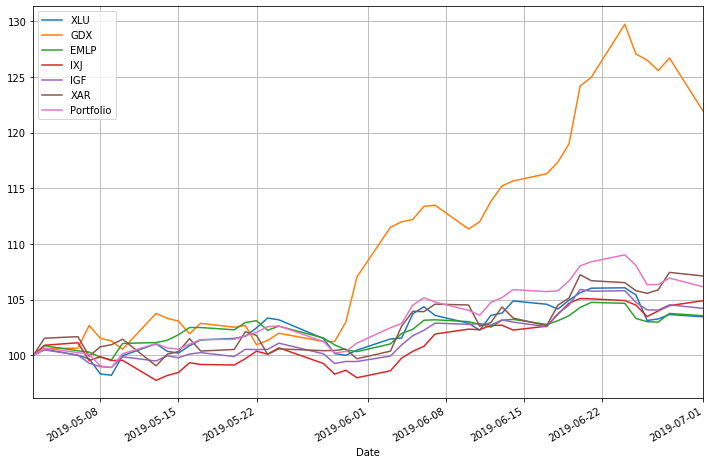

In [17]:
%pylab inline
quote.setup_mask(['XLU', 'GDX', 'EMLP', 'IXJ', 'IGF', 'XAR'])
quote.graph(21, {'IGF': .05, 'XAR': 0.05, 'IXJ': 0.05, 'XLU': 0.67, 'GDX': 0.13, 'EMLP': 0.05})